# Kaggle Titanic Problem

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the CSV files we need

In [137]:
df_train = pd.read_csv("data/train.csv")
df_test  = pd.read_csv("data/test.csv")

###### Take a look at the first 5 records of each dataset to check if the data's been imported correctly. Are there any problems here?

In [138]:
print("Training data header: ")
df_train.head(n=5)

Training data header: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
print("Test data header:")
df_test.head(n=5)

Test data header:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###### Start with cleaning the training data. Can we pull up some basic stats for how complete the data is?

In [140]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### There are 177 missing ages - let's take a look at a few of these to see what's happening!

In [142]:
df_train[df_train['Age'].isnull()].head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


###### Cast objects to strings to make the data ready to use and visualise

In [143]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [144]:
df_train['Name'].astype(str)
df_train['Sex'].astype(str)
df_train['Cabin'].astype(str)
df_train['Embarked'].astype(str)

df_train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### We now have data that's ready to visualise and use. Let's get onto feature engineering, shall we?

## Feature engineering

###### Create a feature engineering dataset. Drop Cabin, since it's mostly empty anyway and doesn't look too useful.

In [145]:
df_base = df_train[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]

###### We could have just used df_base = df_train.drop(columns=['Cabin','Name']), but I like explicitely starting out with what columns we have.

###### Fill missing values in age with 0.

In [146]:
df_base['Age'].fillna(0, inplace=True)

df_base.describe()

df_base[df_base['Age'].isnull()]

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [147]:
df_base['Embarked'].fillna('X', inplace=True)

df_base.describe()

df_base[df_base['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


###### Categorise the Sex and Embarked variables to a number

In [148]:
df_base['Sex'].replace(['male','female'],[0,1],inplace=True)

df_base.head(n=5)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,1,35.0,1,0,113803,53.1000,S
4,5,0,3,0,35.0,0,0,373450,8.0500,S


In [149]:
df_base['Embarked'].replace(['C','Q','S','X'],[1,2,3,-999],inplace=True)

df_base.head(n=5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,3
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,3
3,4,1,1,1,35.0,1,0,113803,53.1000,3
4,5,0,3,0,35.0,0,0,373450,8.0500,3


In [150]:
df_base.loc[df_base['Embarked'] == -999]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,1,38.0,0,0,113572,80.0,-999
829,830,1,1,1,62.0,0,0,113572,80.0,-999


###### Create a family column which is the sum of SibSp and Parch, to show how many family members someone has

In [151]:
df_base['family'] = df_base['SibSp'] + df_base['Parch']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
df_base['alone'] = np.where(df_base['family'] == 0,1,0)

In [165]:
# 0 is no age found - 1 is child - 2 is adult.
df_base['age_group'] = pd.cut(df_base['Age'], [-1, 0, 18,100], labels=[0, 1, 2])

In [166]:
df_base.head(n=5)

df_base.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'family', 'alone', 'age_group'],
      dtype='object')

## Data Exploration

###### Now that we have our feature engineered dataset, let's do some exploring with seaborn!

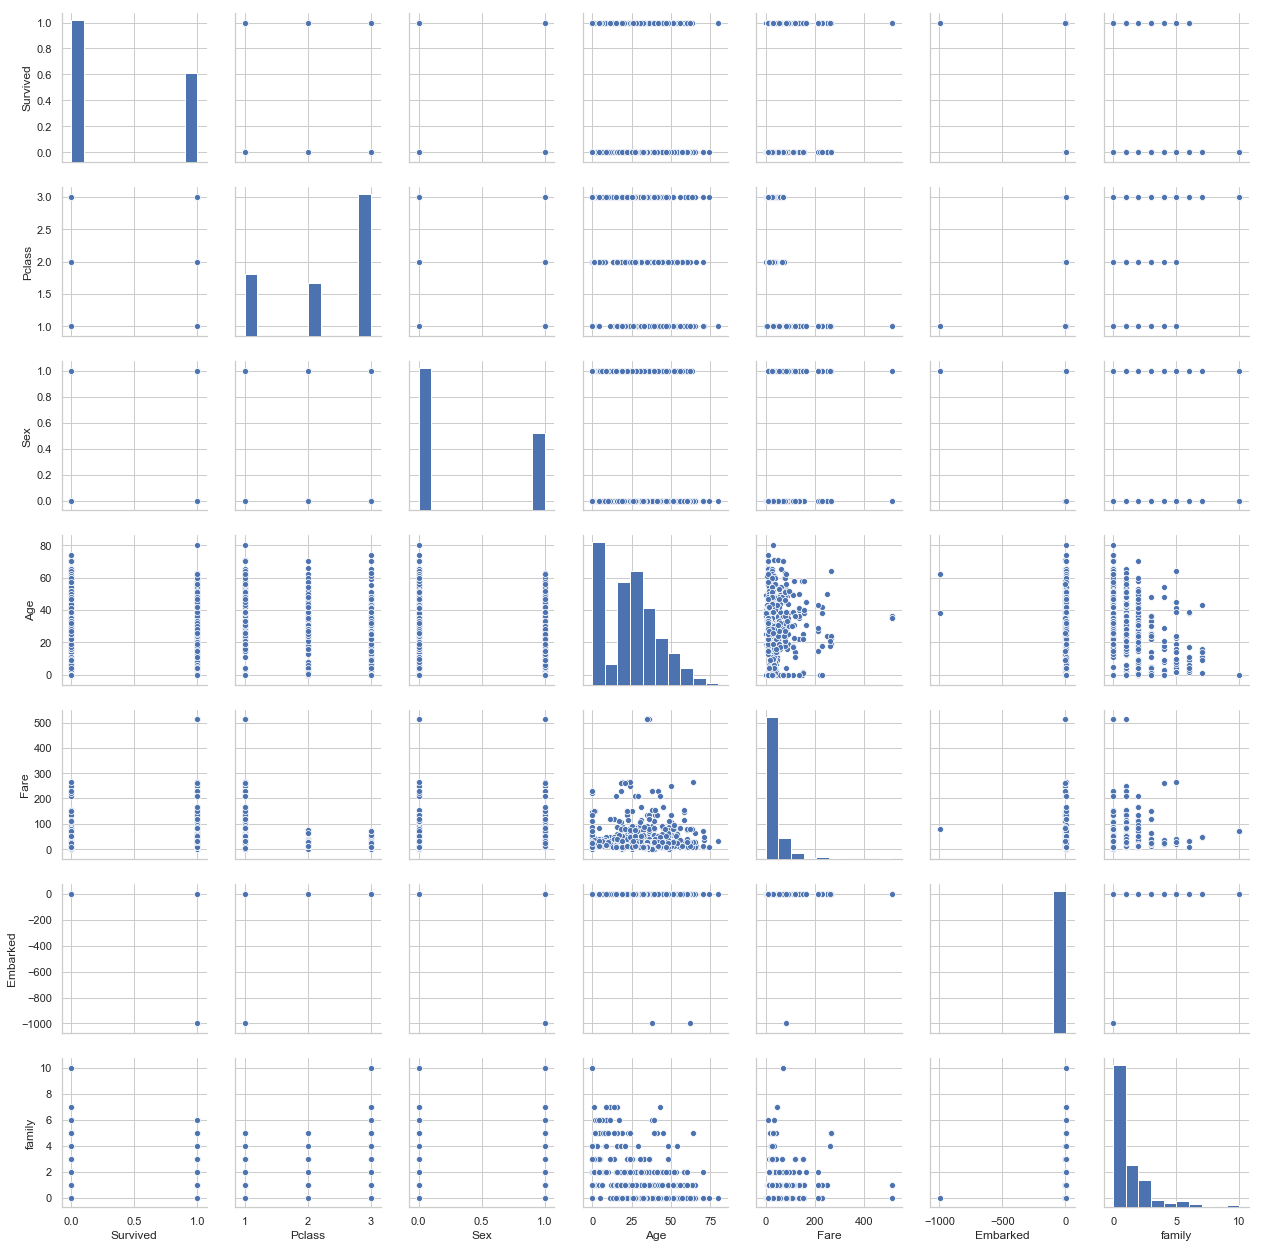

In [167]:
# Correlation graphs for all stats by Survived
col = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family']
sns.pairplot(df_base.loc[:, col].dropna())

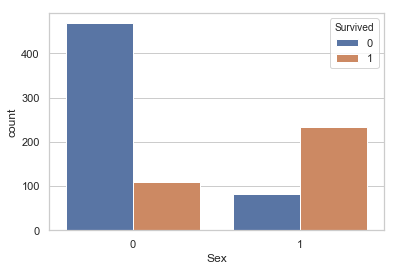

In [168]:
x = sns.countplot(x="Sex", hue="Survived", data=df_base)

###### It looks like if you're male, you're more likely to have died. It definitely looks like the ratio of men that survived is lower than the number of women that survived.

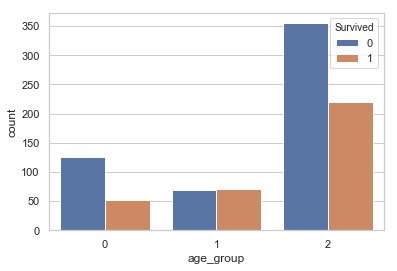

In [169]:
x = sns.countplot(x="age_group", hue="Survived", data=df_base)

###### Looks like if you're an adult, you're less likely to die. Children, surprisingly, are mostly 50/50. Also turns out not having an age at all is a factor, but maybe we shouldn't use that in our model.

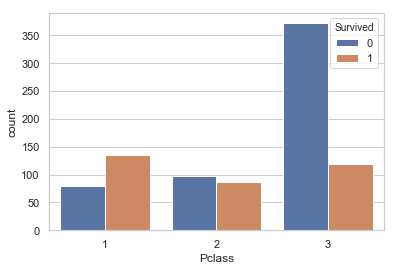

In [170]:
x = sns.countplot(x="Pclass", hue="Survived", data=df_base)

###### If you'e in third class, you're more likely to not survive. Not that surprising, since if you were bottom class, you were likely to be at the bowels of the deck, shoveling coal or participating in Irish dance competitions...

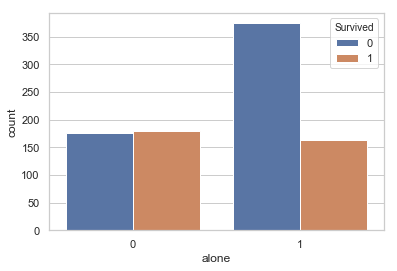

In [171]:
x = sns.countplot(x="alone", hue="Survived", data=df_base)

###### Turns out... if you're alone, you're more likely to die too. Huh, go figure - I'd have thought if you were alone you'd be first.

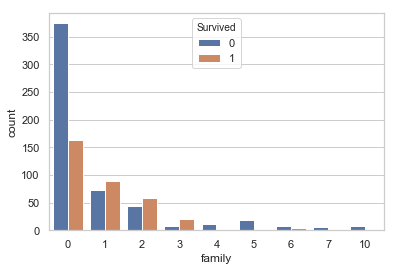

In [172]:
x = sns.countplot(x="family", hue="Survived", data=df_base)

###### We already knew that if you're alone, you're more likely to not survive... but this looks like those with 1-3 family members were generally okay.

In [173]:
df_base.loc[df_base['family'] > 3].PassengerId.count()

62

######  Are there any other features we might want to look at? So far we have these that we think are indicative of survival on the Titanic:

1. Pclass
2. Sex
3. age_group
4. alone

I don't think there's anything else we need, so let's move onto choosing a model.

## Model Build

###### We need to build a minimum viable product (i.e. a model that 'works'), then we can tweak the input variables (also known as features) to come up with a better score.

But first... what type of model do we want to build? We have a 1/0 output, so logistic regression makes sense. We could choose an SVM, or even a Decision Tree or a Random Forest... but right now let's just stick with basics, since this is our first model build, and go for logistic.

###### First, create training and test datasets.

In [200]:
feature_list_final = ['Pclass','Sex','age_group','alone']

features = df_base[feature_list_final]
target = df_base['Survived']

from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=56)

In [201]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(features_train, target_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [202]:
print(clf.score(features_test, target_test))

0.8609865470852018


## Predict on unseen data